## *Exer 1: Clustering*

### 1. Read and write a summary of the metadata .

Dataset: "Onine Retail.xlsx"<br>
Downloaded from: https://archive.ics.uci.edu/ml/datasets/online+retail

- Transactional dataset for a UK based and registered non-store online retail
- Company aminly sells unique all occasion gifts
- Company cutomers are wholesalers
- Data of Transaction between 01/12/2010 and 09/12/2011


Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.


Data Set Characteristics:  Multivariate, Sequential, Time-Series

Number of Instances: 541909

Area: Business

Attribute Characteristics: Integer, Real

Number of Attributes: 8

Date Donated: 2015-11-06

Associated Tasks: Classification, Clustering

Missing Values?: N/A

Number of Web Hits: 675708

In [166]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [167]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


### 2. Select only the transactions that have occurred from 01/04/ 2011 and 09/12/2011 and create a dataset.

In [168]:
df1 = df.loc[((df['InvoiceDate']>='2011-04-01') & (df['InvoiceDate'] <= '2011-12-10'))]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313.0,United Kingdom
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313.0,United Kingdom
42483,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313.0,United Kingdom
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313.0,United Kingdom
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


In [169]:
df1.shape

(392375, 8)

### 3. Calculate the RFM values for each customer (by customer id). RFM represents:

 • R (Recency) − Recency should be calculated as the number of months before he or she has made a purchase from the online store. If he/she made a purchase in the month of December 2011, then the Recency should be 0. If purchase is made in November 2011 then Recency should be 1 and so on and so forth.


In [170]:
recency = df1.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = recency['LastPurchaseDate'].max()
recency['Recency'] = recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
recency

,CustomerID,LastPurchaseDate,Recency
0,12347.0,2011-10-31 12:25:00,39
1,12348.0,2011-09-25 13:13:00,75
2,12349.0,2011-11-21 09:51:00,18
3,12352.0,2011-09-28 14:58:00,72
4,12353.0,2011-05-19 17:47:00,204
...,...,...,...
3875,18280.0,2011-07-03 09:52:00,159
3876,18281.0,2011-12-06 10:53:00,3
3877,18282.0,2011-09-08 15:10:00,92
3878,18283.0,2011-11-30 12:59:00,9


• F (Frequency) − Number of invoices by the customer from 01/04/ 2011 and 
09/12/2011.

In [171]:
frequency = df1.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency.columns = ['CustomerID', 'Frequency']
frequency

,CustomerID,Frequency
0,12347.0,100
1,12348.0,8
2,12349.0,73
3,12352.0,32
4,12353.0,4
...,...,...
3875,18280.0,10
3876,18281.0,7
3877,18282.0,8
3878,18283.0,648


• M (Monetary Value) − Total spend by the customer from 01/04/ 2011 and 
09/12/2011.


In [172]:
df1['Total'] = df1['Quantity']*df1['UnitPrice']
monetary = df1.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary.columns = ['CustomerID', 'Monetary']
monetary

d:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,Monetary
0,12347.0,2537.91
1,12348.0,677.00
2,12349.0,1757.55
3,12352.0,632.50
4,12353.0,89.00
...,...,...
3875,18280.0,180.60
3876,18281.0,80.82
3877,18282.0,98.76
3878,18283.0,1885.43


### 4. Use the elbow method to identify how many customer segments exist, using the RFMvalues for each customer.

In [173]:
df_rfm = pd.merge(recency, frequency, on='CustomerID', how='inner' )
df_rfm = pd.merge(df_rfm,monetary , on='CustomerID', how='inner' )
df_rfm

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12347.0,2011-10-31 12:25:00,39,100,2537.91
1,12348.0,2011-09-25 13:13:00,75,8,677.00
2,12349.0,2011-11-21 09:51:00,18,73,1757.55
3,12352.0,2011-09-28 14:58:00,72,32,632.50
4,12353.0,2011-05-19 17:47:00,204,4,89.00
...,...,...,...,...,...
3875,18280.0,2011-07-03 09:52:00,159,10,180.60
3876,18281.0,2011-12-06 10:53:00,3,7,80.82
3877,18282.0,2011-09-08 15:10:00,92,8,98.76
3878,18283.0,2011-11-30 12:59:00,9,648,1885.43


In [174]:
rfm_normalized = df_rfm[['Monetary', 'Frequency', 'Recency']]
rfm_normalized

,Monetary,Frequency,Recency
0,2537.91,100,39
1,677.00,8,75
2,1757.55,73,18
3,632.50,32,72
4,89.00,4,204
...,...,...,...
3875,180.60,10,159
3876,80.82,7,3
3877,98.76,8,92
3878,1885.43,648,9


In [175]:
scalar = StandardScaler()
rfm_scaled = scalar.fit_transform(rfm_normalized)
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_scaled

,Monetary,Frequency,Recency
0,0.147812,0.122396,-0.470341
1,-0.138055,-0.360687,0.073011
2,0.027936,-0.019378,-0.787297
3,-0.144891,-0.234665,0.027732
4,-0.228381,-0.381691,2.020024
...,...,...,...
3875,-0.214310,-0.350185,1.340833
3876,-0.229638,-0.365938,-1.013694
3877,-0.226882,-0.360687,0.329594
3878,0.047580,2.999891,-0.923135


In [176]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

segments = []
clusters_range = [2,3,4,5,6,7,8]
for num in clusters_range:
    kmeans = KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    segments.append(kmeans.inertia_)
segments

[7868.279933103865,
 4791.234843482091,
 3397.8301577968978,
 2547.7870157366483,
 2058.8861388861646,
 1604.043261296811,
 1404.0168887279294]

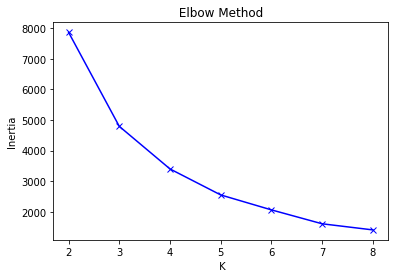

In [177]:
plt.plot(clusters_range, segments, 'bx-')
plt.xlabel(' K')
plt.ylabel('Inertia')
plt.title(' Elbow Method ')
plt.show()

### 5. Create the customer segments with K-means algorithm by using number of clusters is suggested by elbow method.
from sklearn.cluster import KMeans

In [178]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [179]:
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,Cluster_Id
0,12347.0,2011-10-31 12:25:00,39,100,2537.91,0
1,12348.0,2011-09-25 13:13:00,75,8,677.00,0
2,12349.0,2011-11-21 09:51:00,18,73,1757.55,0
3,12352.0,2011-09-28 14:58:00,72,32,632.50,0
4,12353.0,2011-05-19 17:47:00,204,4,89.00,1


In [180]:
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,Cluster_Id
0,12347.0,2011-10-31 12:25:00,39,100,2537.91,0
1,12348.0,2011-09-25 13:13:00,75,8,677.00,0
2,12349.0,2011-11-21 09:51:00,18,73,1757.55,0
3,12352.0,2011-09-28 14:58:00,72,32,632.50,0
4,12353.0,2011-05-19 17:47:00,204,4,89.00,1


In [181]:
rfm_normalized['cluster'] = kmeans.labels_
rfm_normalized

d:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Monetary,Frequency,Recency,cluster
0,2537.91,100,39,0
1,677.00,8,75,0
2,1757.55,73,18,0
3,632.50,32,72,0
4,89.00,4,204,1
...,...,...,...,...
3875,180.60,10,159,1
3876,80.82,7,3,0
3877,98.76,8,92,0
3878,1885.43,648,9,0


### 6. Plot the clusters in a scatter plot and mark each segment differently using lmplot.

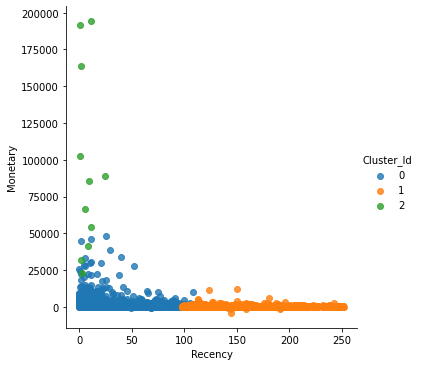

In [189]:
sns.lmplot(x ='Recency', y ='Monetary',fit_reg = False, hue = 'Cluster_Id', data = df_rfm)
plt.show()

### 7. Print the cluster centers of each customer segment and explain them intuitively

Index(['Monetary', 'Frequency', 'Recency'], dtype='object')

Ignoring the just added labels column, We created the cluster using Recency, Frequency, Total. 

#### Cluster 0:
<br>
When comparing to other cluster centres, we find that the recency of this group is the highest(worst), Total amount spent is least, and their frequency is the least. This group of customers can thus be classified as having already stopped visiting/ in danger of stopping further purchases at the store.

#### Cluster 1:
<br>
When comparing to other clusters it is apparent that this group has the lowest recency(best), amount spent is the highest, frequency of visits is the highest.All of these indicate that this group or customers are loyal customers.

#### Cluster 2:
<br>
Finally with this cluster, The values seem to be between the other 2 clusters. These customers are either New  customers which wanted to try out the store, or are customers which visit other stores much like this one. 


### 8. Create the customer segments with Agglomerative algorithm by using number of clusters is suggested by elbow method.
from sklearn.cluster import AgglomerativeClustering

In [186]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(rfm_scaled)
df_rfm['Cluster_A'] = cluster.fit_predict(rfm_scaled)
df_rfm.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,Cluster_Id,Cluster_A
0,12347.0,2011-10-31 12:25:00,39,100,2537.91,0,1
1,12348.0,2011-09-25 13:13:00,75,8,677.00,0,1
2,12349.0,2011-11-21 09:51:00,18,73,1757.55,0,1
3,12352.0,2011-09-28 14:58:00,72,32,632.50,0,1
4,12353.0,2011-05-19 17:47:00,204,4,89.00,1,2


### 9. Visualize the clusters using the dendrogram.

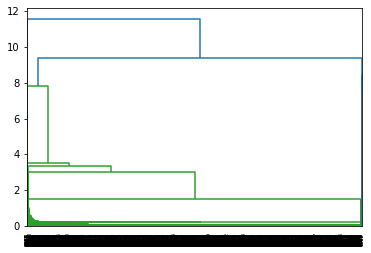

In [187]:
mergings = linkage(rfm_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### 10. Compare the clusters obtained using KMeans vs. Agglomeration.
